# Lecture 5.2: Hypothesis Testing I - Inference for Numerical Data

## Outline

* Recap: confidence intervals - one sample mean
* Introduction to hypothesis testing
    * Null and alternative hypotheses
    * Test statistic
    * p-value
    * Power of test

## Objectives

* Know how to carry out hypothesis testing for mean and proportion
* Understand p-values
* Understand the power of the test

## Recap: Confidence Intervals  

* Allow us to use sample data to estimate a population value, like the true mean, and then put bounds on our estimate.  


* Example: Give a 95% confidence interval for the true average amount of sleep students get every day.  

* If population standard deviation $\sigma$ is known, we estimate the 95% confidence interval for the mean as follows,  

$$ (\bar{X} - 1.96 \frac{\sigma}{\sqrt{n}} \text{, } \bar{X} + 1.96 \frac{\sigma}{\sqrt{n}}) $$  

* If $\sigma$ is unknown, we use the sample standard deviation $s$:  

$$ \bar{X} \pm t \left( \frac{s}{\sqrt{n}} \right) $$   

### One-Sided Confidence Intervals

* The confidence intervals we have seen so far are two-sided intervals for the mean  

* We can also calculate one-sided confidence intervals  

    * One-sided confidence intervals give upper or lower bounds on the value of the population mean  
    
    * For a 95% confidence interval, it puts the 5% all onto one side  
    

* 95% Upper one-side CI   

$$ (- \infty, \bar{X} + 1.64 \frac{\sigma}{\sqrt{n}}) $$  

* 95% Lower one-side CI  

$$ (\bar{X} - 1.64 \frac{\sigma}{\sqrt{n}}, \infty) $$  

* For 95% intervals, $z_{\alpha} = 1.64$; we don’t use 1.96 since these are one-sided intervals.

#### Example

* I want a one-sided 95% lower confidence interval on the average number of minutes my little cousin spends on his xbox video game. I get the tally for each of 30 days and find the mean is 250 minutes/day with a standard deviation of 20 minutes.  

* The interval is  

$$ (250 - 1.70 \frac{20}{\sqrt{30}}, \infty) = (243.8, \infty) $$

In [17]:
%pylab inline
import scipy as stats
from sympy import Eq, S, init_printing
from sympy.stats import Binomial, Die, P, density, sample, sample_iter
init_printing()

Populating the interactive namespace from numpy and matplotlib


C:\Users\Smith\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [18]:
from scipy.stats import t, binom

t_val = t(29).ppf(0.95)
print(t_val)

250 - t_val * 20 /(30**0.5)

1.6991270265334972


* I am 95% confident he spends (on average) at least 243.8 minutes playing xbox every day.

## p-values and Hypothesis Testing

Back to de Méré's *Null Hypothesis* $(H_0)$:
$$ P(win) = \frac{2}{3} $$

In [19]:
X = Binomial('X', 1, S(2)/3)
density(X).dict

In [20]:
binom.pmf([0,1], 1, 2/3)

array([0.33333333, 0.66666667])

If he plays three times, according to $H_0$, he should win:

In [21]:
X = Binomial('X', 3, S(2)/3)
density(X).dict

In [22]:
binom.pmf(range(3+1), 3, 2/3)

array([0.03703704, 0.22222222, 0.44444444, 0.2962963 ])

If he plays nine times, his odds:

In [23]:
X = Binomial('X', 9, S(2)/3)
density(X).dict

In [24]:
binom.pmf(range(9+1), 9, 2/3)

array([5.08052634e-05, 9.14494742e-04, 7.31595793e-03, 3.41411370e-02,
       1.02423411e-01, 2.04846822e-01, 2.73129096e-01, 2.34110654e-01,
       1.17055327e-01, 2.60122949e-02])

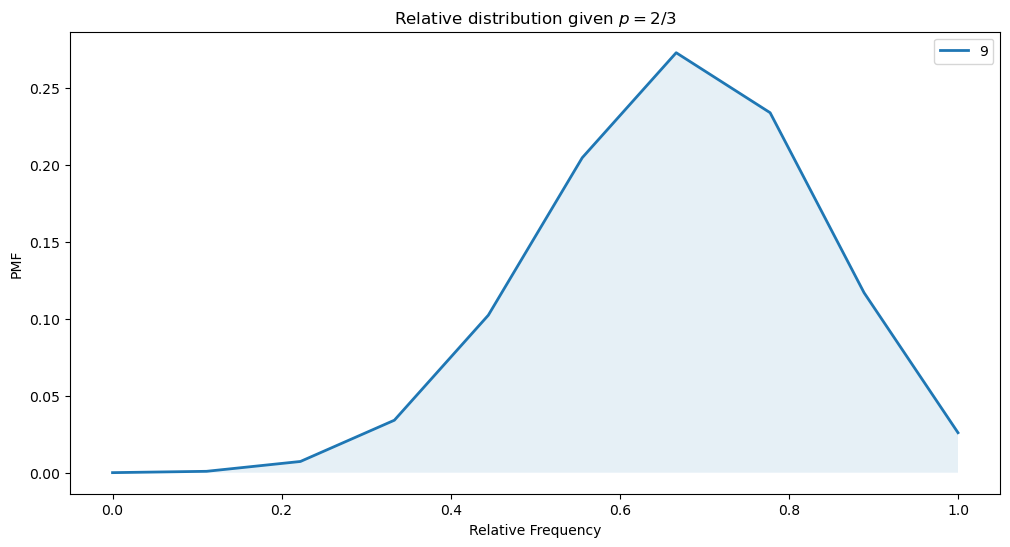

In [25]:
figure(figsize=(12,6))
p = 2/3
k = 9
rv = binom(k, p)
x = linspace(0.0, 1.0, k+1)
y = rv.pmf(range(k+1))
plot(x, y, lw=2, label=k)
fill_between(x, y, alpha=1/9)
legend()
title("Relative distribution given $p = 2/3$")
ylabel("PMF")
xlabel("Relative Frequency");

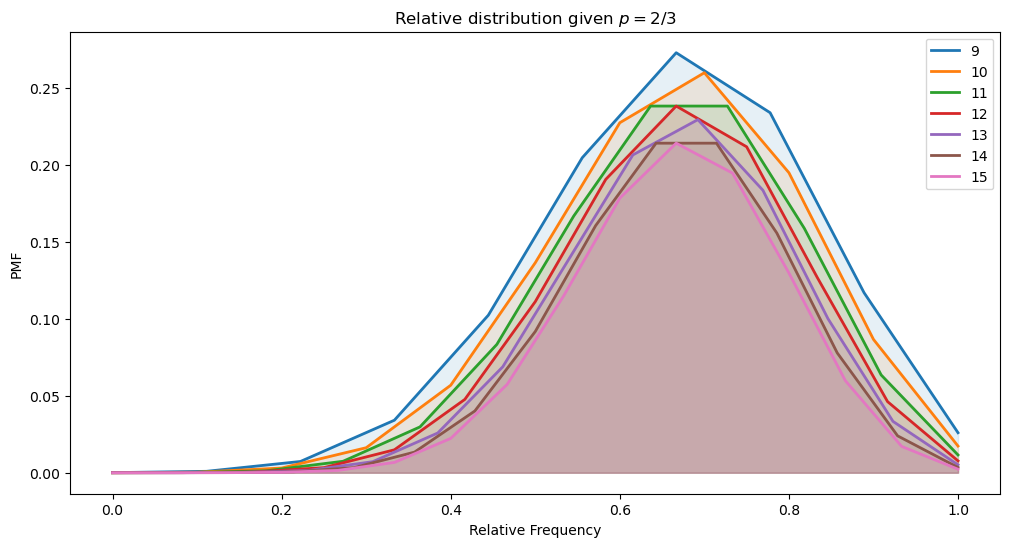

In [26]:
figure(figsize=(12,6))
colors = rcParams['axes.prop_cycle'].by_key()['color']
for k, color in zip(arange(9,16), colors):
    rv = binom(k, p)
    x = linspace(0.0, 1.0, k+1)
    y = rv.pmf(range(k+1))
    plot(x, y, lw=2, color=color, label=k)
    fill_between(x, y, color=color, alpha=1/9)
legend()
title("Relative distribution given $p = 2/3$")
ylabel("PMF")
xlabel("Relative Frequency");

What are the chances of losing 6 out of 12 games, given: $$ H_0: P(win) = \frac{2}{3} $$

In [27]:
X = Binomial('X', 12, S(2)/3)
P(X <= 6)

In [28]:
binom(12, 2/3).cdf(6)

In other words, if we were to play 12 games *100 times*, and $H_0$ *were true*, we could expect to lose half of those 12 about 18% of the time.

How many games do we need to play before we can conclude, from losing half the time, that $p(win) < \frac{2}{3}$

In [29]:
for t in range(12,53,2):
    print("{} trials: p-value = {:.3}".format(t, binom(t, 2/3).cdf(t/2)))

12 trials: p-value = 0.178
14 trials: p-value = 0.149
16 trials: p-value = 0.127
18 trials: p-value = 0.108
20 trials: p-value = 0.0919
22 trials: p-value = 0.0787
24 trials: p-value = 0.0677
26 trials: p-value = 0.0583
28 trials: p-value = 0.0503
30 trials: p-value = 0.0435
32 trials: p-value = 0.0377
34 trials: p-value = 0.0327
36 trials: p-value = 0.0283
38 trials: p-value = 0.0246
40 trials: p-value = 0.0214
42 trials: p-value = 0.0187
44 trials: p-value = 0.0163
46 trials: p-value = 0.0142
48 trials: p-value = 0.0124
50 trials: p-value = 0.0108
52 trials: p-value = 0.00946


What is a p-value?
==================

What it's not:
------------------

* It is ***not*** the probability that the null hypothesis is true.

* It is ***not*** the inverse of the probability that the alternative hypothesis *is* true.

What it is:
------------------

* The *p-value* is the probability of an observed outcome *if the null hypothesis **were** true*.

*N.B. Statistics is incapable of proving that anything is true. It can only suggest that something **probably isn't**.*

## Introduction to Hypothesis Testing

We have discussed two methods for making inference about population parameters based on a random sample, e.g. how do we figure out the true mean.  

* Point estimates give us a single “guess”  

* Confidence intervals give us a region  

Alternatively, we might be interested in using the information in a sample to test hypothesis about parameters in the population.

**What is a hypothesis?**  


A **hypothesis** (or claim) is simply **a belief** (usually based on some relevant information).  


Some examples of a hypothesis:  

* Taking pain killers reduces the pain  

* Doing homework increases scores on exams  

* A company that has a 10% market share launches a marketing campaign. At the end of the campaign period the company conducts a survey in order to assess whether its market share has increased   

* A bottling machine is set to automatically fill each bottle with 12 oz of soft drink. To check whether the machine needs to be readjusted, a quality control inspector examines a random sample of newly filled bottles.

### Hypothesis Testing  


* Allows us to use sample data to test a claim about a population, such as testing whether a population mean or population proportion equals some number  


* Example: Do students, on average, sleep 8 hours every night?

#### Parameter Identification  

* Hypothesis tests can be carried out on all the population parameters (the Greek letters), such as the population median or variance  


* Today, we will conduct tests of hypothesis only regarding the population mean $\mu$ or the population proportion $p$

* In the market share example: 
    * A company that has a 10% market share launches a marketing campaign. At the end of the campaign period the company conducts a survey in order to assess whether its market share has increased  
    * The parameter of interest may be defined as $p =$ the true proportion of customers who would purchase the company's products at the conclusion of the marketing campaign.  
    

* In the bottling machine example:  
    * A bottling machine is set to automatically fill each bottle with 12 oz of soft drink. To check whether the machine needs to be readjusted, a quality control inspector examines a random sample of newly filled bottles
    * The parameter of interest may be defined as $\mu =$ the true mean volume (in oz) per bottle

#### Naming the Hypotheses

We have special names for the hypotheses under consideration.

* We call the conventional belief, the status quo or prevailing viewpoint, the **null hypothesis** and denote it by $H_0$

* The competing belief is referred to as the alternative hypothesis and is denoted by $H_1$ or $H_a$  

* The null hypothesis is generally a statement that there is nothing happening, no difference, or no change in the population.

* The alternative hypothesis is an alternative to the null hypothesis. It is the statement that the researcher hopes is true, namely, the change in the population that the researcher is looking for

**The Null Hypothesis**  

The null hypothesis, which is denoted $H_0$, specifies a specific value for the population parameter.  

* In the market share example  

$$ H_0: p = 10\% $$  

* In the bottling machine example  

$$ H_0: \mu = 12 $$

**The Alternative Hypothesis**  

If the null hypothesis is not true then something else must be true. We call this the alternative hypothesis and denote it by $H_1$ or $H_a$  

* In the marketing example the alternative hypothesis is called **one sided** because we are testing against the alternative that the market share is now greater than 10%:  

$$  H_0: p = 10\% \qquad H_a: P > 10\% $$  

* For the bottling machine example, we want to test the null hypothesis that the mean is equal to 355ml against the alternative that the mean is either larger than or smaller than 12 oz. This is called a **two sided** alternative.

$$ H_0: \mu = 12 \qquad H_a: \mu \neq 12 $$

**Example**  

Suppose you work for a company that produces cooking pots with an average life span of 7 years. To gain a competitive advantage you suggest using a new material that claims to extend the life span of the pots. You want to test the hypothesis that the average life span of the cooking pots made with this new material increases.  


$H_0: $  


$H_a: $

#### General Framework  

* Start with some claim ($H_0$ and $H_a$)  


* Collect evidence (data)  


* In statistics, we always assume the null hypothesis is true at first (like assuming the defendant is innocent until proven guilty)  


* Then, make a decision based on the available evidence  

    * If there is sufficient evidence, **reject the null hypothesis** (i.e. defendent is guilty)  
    
    * If there is not enough evidence, **do not reject the null hypothesis** (i.e. defendent is not guilty)

**Note**: accepting the null hypothesis is **NOT** an option.

**What can go wrong?**  

Because the conclusion we will be making is based on sample data, the possibility of making an error always exists.  

<img src="images/type12.png" width="600">

#### Types of Errors  

* Type I error: The null hypothesis is rejected when it is true.  


* Type II error: The null hypothesis is not rejected when it is false.  


* There is always a chance of making one of these errors. We will want to minimize the chance of doing so.  

**Examples**  

$H_0$: Defendant is not guilty.  

$H_a$: Defendant is guilty.  

What is the type I error?  

What is the type II error?  

Which error is more important? 

The milemaster tire company has decided that their new tire must last more than 45,000 miles or they won't market it.  

$H_0$: tire lasts 45,000 (or less)  

$H_a$: tire lasts more than 45,000  

What is the type I error? The type II error?  

What is the cost of a type I error here?  

What is the cost of a type II error?  


#### The significance Level  

We define  

$$ \alpha = P(\text{Type I error}) = P(\text{reject } H_0 | H_0 \text{ is true}) $$  

We normally use $\alpha = 0.5$ : called the **significance level**  

*This is a pretty standard value but it is not set in stone. Usually the greater the cost of a type I error, the smaller this number is.*

#### Statistical Power

We define  

$$ \beta = P(\text{Type II error}) = P(\text{fail to reject } H_0 | H_1 \text{ is true}) $$

and the **power** of a test is defined as  

$$ power = P(\text{reject } H_0 | H_1 \text{ is true}) = 1 - \beta $$

#### Methods for doing hypothesis testing  

We will show 2 methods for doing the hypothesis test:  

* Confidence Interval method  

* P-value method

#### Testing a two-sided hypothesis using the confidence interval method

* Step 1: Define hypothesis  

$$ H_0: \mu = \mu_0 $$  
$$ H_a: \mu \neq \mu_0 $$  

* Step 2: Construct confidence interval  


* Step 3: Reject or fail to reject  
    * If $\mu_0$ falls within this interval, then we fail to reject the null, otherwise we reject it.

**Example**  

A machine being used for packaging seedless golden raisins has been set so that on the average 15 ounces of raisins will be packaged per box. The quality control engineer wishes to test the machine setting and selects a sample of 30 raisin boxes. He finds $\bar{x} = 15.11$ and $s = 0.4058$.  

He wants to know if the mean weight per box is different from 15 ounces.  

* Step 1: Define hypothesis  

$$ H_0: \mu = 15 $$  
$$ H_a: \mu \neq 15 $$  

* Step 2: Construct confidence interval  

The 95% confidence interval is (14.96, 15.26).

* Step 3: What can we conclude?  

Since 15 falls within the interval, we fail to reject the null hypothesis. We do not have sufficient evidence to conclude that the mean weight per box is different from 15 ounces.

#### The test statistic

* We could also "unwrap" the confidence interval into a test statistics

* In the one sample mean case, we define the test statistic to be  

$$ t_{stat} = \frac{\bar{X} - \mu_0}{s/ \sqrt{n}} $$

* Assume the null hypothesis is true, $\mu = \mu_0$, then

$$ t_{stat} \sim t_{n - 1} $$

**Question**: What is the test statistic for the previous example?  

A machine being used for packaging seedless golden raisins has been set so that on the average 15 ounces of raisins will be packaged per box. The quality control engineer wishes to test the machine setting and selects a sample of 30 raisin boxes. He finds $\bar{x} = 15.11$ and $s = 0.4058$.  

He wants to know if the mean weight per box is different from 15 ounces.  

$\bar{x} = 15.11$   

$s = 0.4058$   

$n = 30$  

$\mu_0 = 15$   

$$ t_{stat} = \frac{\bar{x} - \mu_0}{s/ \sqrt{n}}  = \frac{15.11 - 15}{0.4058/ \sqrt{30}} = 1.48$$

In [50]:
from scipy import stats
percentile5 = stats.t(35).ppf(0.05)
print(percentile5)
t_stat = (15.11 - 15)/(0.4058 / 30**0.5)
print(t_stat)

-1.6895724539637715
1.4847087561746666


#### Introducing the p-value

* The **p-value** is a way of quantifying the strength of the evidence against the null hypothesis and in favor of the alternative.  


* The p-value gives the probability of seeing something as weird as what we did see, if $H_0$ is true.  


* The p-value stands for Probability Value, and is a number between 0 and 1.    

* It is a measure of consistency - How consistent is the observed data with the null hypothesis?     


* The larger the p-value the more consistent the data is with the null, the smaller the p-value the more consistent the data is with the alternative.  

** Question**: What is the p-value for the raisin example?  

Assuming $H_0$ is true, so $\mu = \mu_0 = 15$, then

$$ t_{stat} = \frac{\bar{X} - \mu_0}{s/ \sqrt{n}} \sim t_{n - 1} $$  

$\begin{align}p\text{-value} = P(|t_{n - 1}| > |t_{stat}|) &= P(t_{n - 1} < -1.48 \text{ or } t_{n - 1} > 1.48) \\&= 2 \times P(t_{n - 1} < -1.48) = 0.15\end{align}$

In [40]:
stats.t(29).cdf(-t_stat) * 2

The following graph shows the process of calculating the p-value for both one-sided and two-sided tests when the population standard deviation $\sigma$ is known.

<img src="images/p-value.png" width="700">

<img src="images/interpret_p.png">

#### Formal testing using p-values

The process  

* Step 1: state the null and alternative hypotheses  

* Step 2: Choose a significant level $\alpha$ (usually 0.05)  

* Step 3: Calculate the test statistic  

* Step 4: Compute the p-value  

* Step 5: Make your decision

**Example**

* The manager of a department store is thinking about establishing a new billing system for the store's credit customers.  

* She determines that the new system will be cost effective only if the mean monthly account is more than \$170. A random sample of 400 monthly accounts is drawn, for which the sample mean is \$173, with a sample standard deviation of \$65.  

* Can the manager conclude from this that the new
system will be cost-effective?

The system will be cost effective if the mean account balance for all customers is greater than \$170.  
We express this belief as our research hypothesis, that is:  

$H_a: \mu > 170$ (this is what we want to determine)  


$H_0: \mu = 170$ this specifies a single value for the parameter of interest)  

What we want to show:

$H_0: \mu = 170$ (we will assume this is true)    

$H_a: \mu > 170$  

We know:

$n = 400$  

$\bar{x} = 173$  

$s = 65$  

What to do next?  

$$t_{stat} = \frac{\bar{x} - \mu_0}{s/ \sqrt{n}} = \frac{173 - 170}{65/ \sqrt{400}} = 0.92$$

In [41]:
(173 - 170)/(65 / 400**0.5)

$$\text{p-value} = P(t > 0.92) = 0.18 \Rightarrow \text{ fail to reject } H_0  $$

In [42]:
stats.t(399).sf(0.92)

Conclusion? There is not enough evidence to conclude that the new system will be cost effective.  

This process is called a **one sample t-test** for the mean.

**Example**  

According to Zagats (2005), the average cost for a better dinner in the U.S. was \$30.50.  
You think food is cheaper in your town and want to test this hypothesis.  

We survey 36 restaurants and find a sample mean of \$27.80 and standard deviation of \$6.60.  

* Step 1: state the null and alternative

$$ H_0: \mu = 30.50 $$
$$ H_a: \mu < 30.50 $$

* Step 2: significance level  

$$ \alpha = 0.05$$

* Step 3: calculate test statistic

$$t_{stat} = \frac{\bar{x} - \mu_0}{s/ \sqrt{n}} = \frac{27.80 - 30.50}{6.60/ \sqrt{36}} = -2.45$$

* Step 4: p-value

In [43]:
stats.t(35).cdf(-2.45)

$$\text{p-value} = P(t < -2.45) = 0.010 < 0.05 $$

* Step 5: make decision  


Since p-value $< 0.05$, we reject the null hypothesis. At the 5% level of significance, we did find sufficient evidence to conclude that the average dinner cost is less than \$30.50.

**Example cont.**  

If we know that the true average cost for a better dinner is $29, what is the power of the test?

Since we know that $\mu = 29$, then  

$$ \frac{\bar{X} - \mu}{s/ \sqrt{n}} = \frac{\bar{X} - 29}{6.6/ \sqrt{36}} \sim t_{n - 1}$$ 

power = $P(\text{reject } H_0 | H_a \text{ is true})$

<img src="images/power.png" width="600">

When would we reject $H_0$?

When p-value $< 0.05$.

What is the value of $\bar{X}$ when p-value $< 0.05$?

p-value = $P(t_{35} < t_{stat}) = P(t_{35} < \frac{\bar{x} - \mu_0}{s/ \sqrt{n}}) < 0.05$

In [44]:
from scipy import stats
percentile5 = stats.t(35).ppf(0.05)
print(percentile5)

-1.6895724539637715


In [45]:
stats.t(35).cdf(percentile5)

In [47]:
from scipy.stats import ttest_1samp
t_statistic, two_tailed_p_value = ttest_1samp(sample, null_mean)

NameError: name 'null_mean' is not defined

In [48]:
x_bar = percentile5 * (6.6 / 36**0.5) + 30.5
print(x_bar)

28.641470300639853


$\Rightarrow$ when $\bar{x} < 28.64$, p-value $< 0.05$

power = $P(\text{reject } H_0 | H_a \text{ is true}) = P(t_{35} < \frac{28.64 - 29}{6.6/ \sqrt{36}}) = 0.37$

In [49]:
stats.t(35).cdf((x_bar - 29)/(6.6 / 36**0.5))

$$ \text{p-value } = P(t < -1.08 \text{ or } t > 1.08) = 0.28 > 0.05 $$  

We fail to reject the null. We don't have sufficient evidence to conclude that the true proportion of female patrons is different from 70%.  


This is often called the **one sample z-test** for proportions.

#### One Sided Intervals for proportions 

* 95% Upper one-side CI   

$$ (- \infty, \hat{p} + 1.64 \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}) $$  

* 95% Lower one-side CI  

$$ (\hat{p} - 1.64 \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}, \infty) $$  

* For 95% intervals, $z_{\alpha} = 1.64$; we don’t use 1.96 since these are one-sided intervals